<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


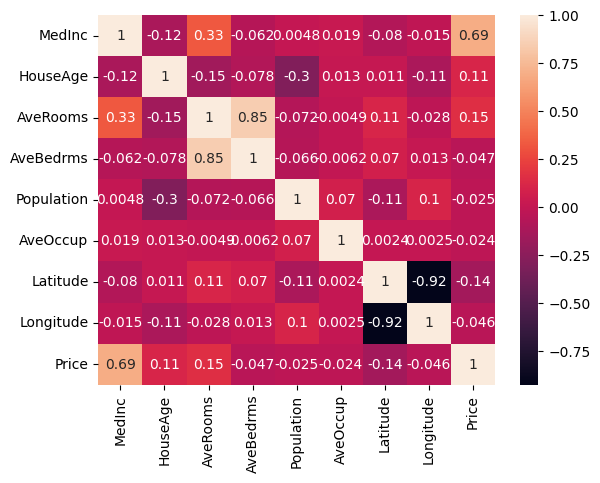

X_train shape: (14448, 8)
X_test shape: (6192, 8)
y_train shape: (14448,)
y_test shape: (6192,)
Coefficients: [ 0.83329476  0.12211856 -0.28024737  0.33652609  0.00148665 -0.02868206
 -0.92659537 -0.89282551]
Intercept: 2.0666131402270147
MSE: 0.5540440300082567
MAE: 0.5370779294017782
RMSE: 0.7443413397146881
R² Score: 0.5913048824900672
Adjusted R²: 0.590776084020056


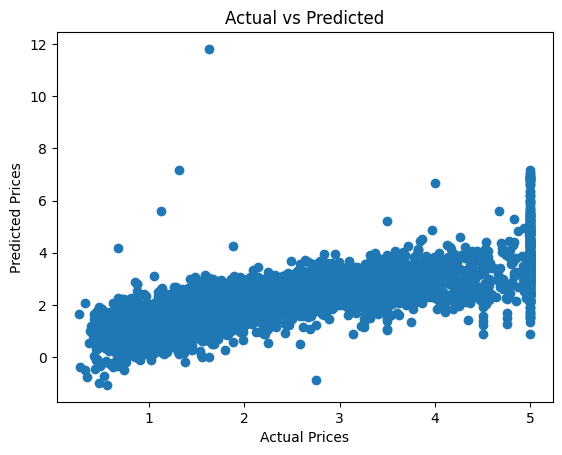

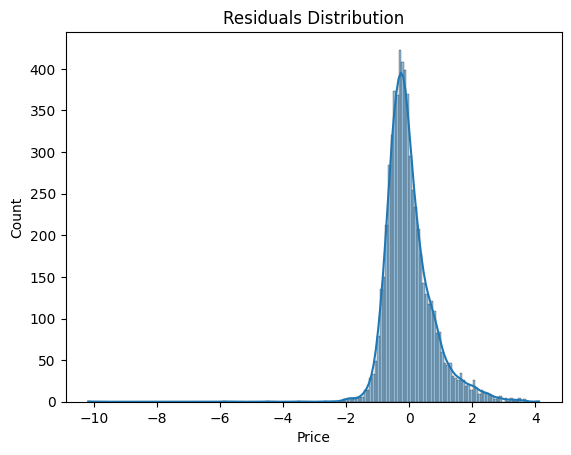

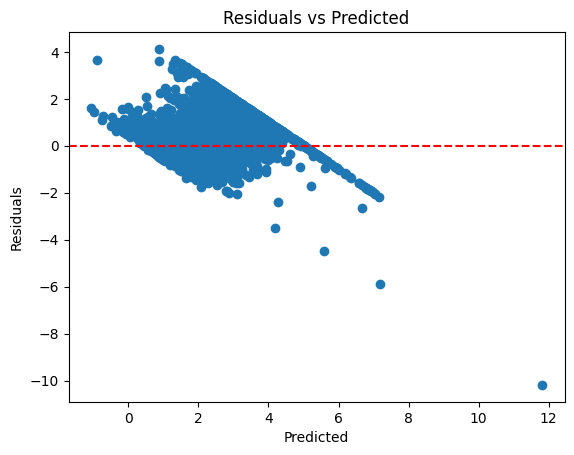

In [24]:
# ✅ Step 1: Load the Dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california
# | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude | MedHouseVal |
# | ------ | -------- | -------- | --------- | ---------- | -------- | -------- | --------- | ----------- |
# | 8.3252 | 41       | 6.98     | ...       | ...        | ...      | 37.88    | -122.23   | 4.526       |
# | 8.3014 | 21       | 6.24     | ...       | ...        | ...      | 37.86    | -122.22   | 3.585       |
# | 7.2574 | 52       | 8.29     | ...       | ...        | ...      | 37.85    | -122.24   | 3.521       |
# | ...    | ...      | ...      | ...       | ...        | ...      | ...      | ...       | ...         |
california.keys()
# dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
california.target_names # ['MedHouseVal'] #target variable
# 📘 Explanation:
# We use the California Housing Dataset to predict house prices using features like income, location, etc.

# ✅ Step 2: Convert to a Pandas DataFrame
import pandas as pd
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target
data.head()

# | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude | Price |
# | ------ | -------- | -------- | --------- | ---------- | -------- | -------- | --------- | ----- |
# | 8.3252 | 41.0     | 6.984127 | 1.023810  | 322.0      | 2.555556 | 37.88    | -122.23   | 4.526 |
# | 8.3014 | 21.0     | 6.238137 | 0.971880  | 2401.0     | 2.109842 | 37.86    | -122.22   | 3.585 |
# | 7.2574 | 52.0     | 8.288136 | 1.073446  | 496.0      | 2.802260 | 37.85    | -122.24   | 3.521 |
# | 5.6431 | 52.0     | 5.817352 | 1.073059  | 558.0      | 2.547945 | 37.85    | -122.25   | 3.413 |
# | 3.8462 | 52.0     | 6.281853 | 1.081081  | 565.0      | 2.181467 | 37.85    | -122.25   | 3.422 |

# 📘 Explanation
# We convert the dataset into a Pandas DataFrame for easier manipulation and analysis. 
# The target variable (house prices) is added as a new column.:

#✅ Step 3: Check the Data
data.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 20640 entries, 0 to 20639
# Data columns (total 9 columns):
#  #   Column      Non-Null Count  Dtype  
# ---  ------      --------------  -----  
#  0   MedInc      20640 non-null  float64
#  1   HouseAge    20640 non-null  float64
#  2   AveRooms    20640 non-null  float64
#  3   AveBedrms   20640 non-null  float64
#  4   Population  20640 non-null  float64
#  5   AveOccup    20640 non-null  float64
#  6   Latitude    20640 non-null  float64
#  7   Longitude   20640 non-null  float64
#  8   Price       20640 non-null  float64
# dtypes: float64(9)
# memory usage: 1.4 MB
data.describe()     
data.isnull().sum()  # Check for missing values
# MedInc        0
# HouseAge      0
# AveRooms      0
# AveBedrms     0
# Population    0
# AveOccup      0
# Latitude      0
# Longitude     0
# Price         0
# dtype: int64

#✅ Step 4: Visualize the Data
import seaborn as sns
import matplotlib.pyplot as plt
#annot=True is used to display the correlation coefficients on the heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()
# 📘 Explanatio
# This shows how features are correlated with the target — useful for understanding relationships.

#✅ Step 5: Split Features and Target
data.head()
# | Index | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude | Price |
# | ----- | ------ | -------- | -------- | --------- | ---------- | -------- | -------- | --------- | ----- |
# | 0     | 8.3252 | 41.0     | 6.984127 | 1.023810  | 322.0      | 2.555556 | 37.88    | -122.23   | 4.526 |
# | 1     | 8.3014 | 21.0     | 6.238137 | 0.971880  | 2401.0     | 2.109842 | 37.86    | -122.22   | 3.585 |
# | 2     | 7.2574 | 52.0     | 8.288136 | 1.073446  | 496.0      | 2.802260 | 37.85    | -122.24   | 3.521 |
# | 3     | 5.6431 | 52.0     | 5.817352 | 1.073059  | 558.0      | 2.547945 | 37.85    | -122.25   | 3.413 |
# | 4     | 3.8462 | 52.0     | 6.281853 | 1.081081  | 565.0      | 2.181467 | 37.85    | -122.25   | 3.422 |

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except 'Price' (independent features)
y = data['Price']       # Target variable (house price)

# 📘 Explanation:
# Separate the dataset into inputs (X) and output (y) for modeling.
X.head()
# | Index | MedInc | HouseAge | AveRooms | AveBedrms | Population | AveOccup | Latitude | Longitude |
# |-------|--------|----------|----------|-----------|------------|----------|----------|-----------|
# | 0     | 8.3252 | 41.0     | 6.984127 | 1.023810  | 322.0      | 2.555556 | 37.88    | -122.23   |
# | 1     | 8.3014 | 21.0     | 6.238137 | 0.971880  | 2401.0     | 2.109842 | 37.86    | -122.22   |
# | 2     | 7.2574 | 52.0     | 8.288136 | 1.073446  | 496.0      | 2.802260 | 37.85    | -122.24   |
# | 3     | 5.6431 | 52.0     | 5.817352 | 1.073059  | 558.0      | 2.547945 | 37.85    | -122.25   |
# | 4     | 3.8462 | 52.0     | 6.281853 | 1.081081  | 565.0      | 2.181467 | 37.85    | -122.25   |
y.head()
# | Index | Price  |
# |-------|--------|
# | 0     | 4.526  |
# | 1     | 3.585  |
# | 2     | 3.521  |
# | 3     | 3.413  |
# | 4     | 3.422  |

# ✅ Step 6: Train-Test Split
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# X_train shape: (14448, 8)
# X_test shape: (6192, 8)
# y_train shape: (14448,)
# y_test shape: (6192,)

# ✅ Step 7: Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 📘 Explanation:
# Scaling makes all input features fall in the same range (important for linear regression)

# ✅ Step 8: Train the Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
# 📘 Explanation:
# This trains the model to find the best-fit line that minimizes error between actual and predicted prices.

# ✅ Step 9: Check Coefficients and Intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)
# Coefficients: [ 0.83329476  0.12211856 -0.28024737  0.33652609  0.00148665 -0.02868206
#  -0.92659537 -0.89282551]
# Intercept: 2.0666131402270147
# 📘 Explanation:
# These values help understand how each feature affects the prediction.

# ✅ Step 10: Make Predictions
y_pred = regressor.predict(X_test_scaled)
# 📘 Explanation:
# Now the model will predict house prices for the test data.

# ✅ Step 11: Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2) #R² Score: 0.5913048824900672
# MSE: 0.5540440300082567
# MAE: 0.5370779294017782
# RMSE: 0.7443413397146881

# 📘 Explanation:
# We check how accurate the predictions are. Lower errors and higher R² are better.

# ✅ Step 12: Calculate Adjusted R² Score
n = len(y_test)
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R²:", adjusted_r2) #Adjusted R²: 0.590776084020056
# 📘 Explanation:
# Adjusted R² is more reliable when using multiple input features — it avoids overfitting.

# ✅ Step 13: Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()
# 📘 Explanation:
# This plot shows how close the predictions are to the actual values.

# ✅ Step 14: Check Residuals
residuals = y_test - y_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predictions
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()









